In [66]:
import numpy as np
import qutip as q
import matplotlib.pyplot as plt

In [9]:
def couple(A, B, i, N):
    '''
    :return: id_0 x ... x id_i-1 x C x id_i+2 x ... x id_N-1
    '''
    
    if i == 0:
        return q.tensor(A, B, q.identity([2]*(N-2)))
    elif i == N-2:
        return q.tensor(q.identity([2]*(N-2)), A, B)
    elif i == N-1:
        return q.tensor(B, q.identity([2]*(N-2)), A)
    elif i >= N:
        raise Exception('invalid index')
    else:
        return q.tensor(q.identity([2]*i),A, B, q.identity([2]*(N-2-i)))

In [25]:
N = 4
dims = [2] * N

H = q.qzero(dimensions=dims)
H = H + N * q.identity(dims)

sx, sy, sz = q.sigmax(), q.sigmay(), q.sigmaz()

for i in range(0, N):
    H = H - couple(sx, sx, i, N)
    H = H - couple(sy, sy, i, N)
    H = H - couple(sz, sz, i, N)

print(H)
# print(H.eigenenergies())
# print(H.eigenstates())

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  4. -2.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -2.  4.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0. -2.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.]
 [ 0.  0. -2.  0.  4.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -2.  0.  8. -2.  0.  0. -2.  0.  0. -2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -2.  4.  0.  0.  0. -2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0. -2.  0.  0. -2.  0.]
 [ 0. -2.  0.  0. -2.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -2.  0.  0.  0.  4. -2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -2.  0.  0. -2.  0.  0. -2.  8.  0. -2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  4.  0. -2.  0.  0.]
 [ 0.  0.  0.  0.  0. -2.  0.  0.  0.  0. -2.  0.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  

In [35]:
psi_0 =q.tensor(q.basis(2,0), q.basis(2,0), q.basis(2,0), q.basis(2,1))
# print(psi_0)


In [62]:
t_arr = np.linspace(0,1,10)
res = q.sesolve(H, psi_0, t_arr)

print(res.states[1].data)

  (1, 0)	(0.8589935523033727-0.4090711999550698j)
  (2, 0)	(0.09243127975574217+0.19409301713452184j)
  (4, 0)	(-0.04385611436832201+0.020885165686026233j)
  (8, 0)	(0.09243127975574214+0.19409301713452182j)


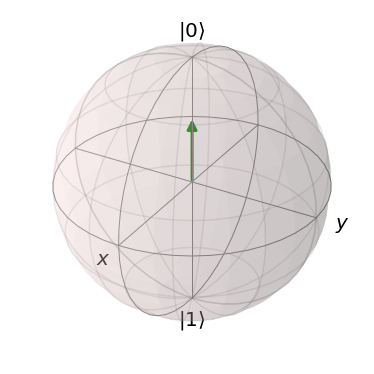

In [65]:
b = q.Bloch()
psi = res.states[3]
psi = psi.ptrace(0)

b.add_states(psi)

b.show()

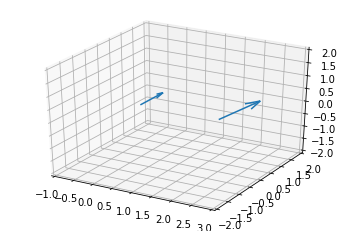

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

q.vector

X, Y, Z = [0,1,2],[0,0,0],[0,0,0]
U, V, W = [0,0,1],[1,0,0],[0,0,1]
ax.quiver(X,Y,Z, U, V, W)
ax.set_xlim([-1, 3])
ax.set_ylim([-2,2])
ax.set_zlim([-2, 2])
plt.show()